# CNN (Convolutional Neural Network) Full coding
# Sumary
## 1. Pre-process Trained Data
### 1.1 Train 4D_TrainingData_FEI
### 1.2 Train 4D_TrainingData_JAFFE
### 1.3 Train 4D_TrainingData_FEIANDJAFFE

- Convert to Grayscale
- Convert to size 50 x 50
- Convert to 4D array
- Save into Pickle File

## 2. CNN Save trained Model in hdf5 file
### 2.1 Save CNN_Model_FEI hdf5 file
### 2.2 Save CNN_Model_JAFFE hdf5 file
### 2.3 Save CNN_Model_FEIANDJAFFE hdf5 file


## 3. CNN Test

# Import necessary library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# Test Print the Image after the process

AI_Assignment2_DataSet_V1\JAFFE DATASET_Sorted_V3\bad
AI_Assignment2_DataSet_V1\JAFFE DATASET_Sorted_V3\bad\JPG_0.tiff
<class 'numpy.ndarray'>


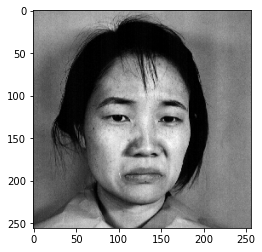

AI_Assignment2_DataSet_V1\JAFFE DATASET_Sorted_V3\good
AI_Assignment2_DataSet_V1\JAFFE DATASET_Sorted_V3\good\JPG_0.tiff
<class 'numpy.ndarray'>


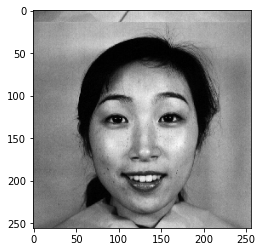

In [2]:

DATADIR = "AI_Assignment2_DataSet_V1\JAFFE DATASET_Sorted_V3"
CATEGORIES = ["bad", "good"]

for category in CATEGORIES:  # do bad and good
    path = os.path.join(DATADIR,category)  # create path to bad and good
    print(path) #Check path
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE )  # convert to array 
        print(os.path.join(path,img)) #Check Image path
        print(type(img_array))   # Check Image converted type
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
#     break  #...and one more!
    


# 1. Pre-processed Training Data
## 1.1 Train 4D_TrainingData_FEI

In [3]:
IMG_SIZE = 50 #set image size
training_data = []

DATADIR = "AI_Assignment2_DataSet_V1\FEI_DATASET_Sorted_V3"
CATEGORIES = ["bad", "good"]
def create_training_data():
    for category in CATEGORIES:  # do bad and good

        path = os.path.join(DATADIR,category)  # create path to bad and good
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=bad 1=good

        for img in tqdm(os.listdir(path)):  # iterate over each image per bad and good
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

# Shuffle the train data
import random
random.shuffle(training_data)

# Check the train data were shuffled successful
for sample in training_data[:20]:
    print(sample[1])
    
#Add the trained data into a list
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Convert all the picture array into 4 dimension with size of 50

import pickle

pickle_out = open("X_FEI_4D.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_FEI_4D.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

100%|██████████| 200/200 [00:00<00:00, 267.34it/s]

400
1
1
0
1
0
1
0
0
0
0
0
1
1
0
1
0
0
0
1
1


## 1.2 Train 4D_TrainingData_JAFFE

In [4]:
IMG_SIZE = 50 #set image size
training_data = []

DATADIR = "AI_Assignment2_DataSet_V1\JAFFE DATASET_Sorted_V3"
CATEGORIES = ["bad", "good"]
def create_training_data():
    for category in CATEGORIES:  # do bad and good

        path = os.path.join(DATADIR,category)  # create path to bad and good
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=bad 1=good

        for img in tqdm(os.listdir(path)):  # iterate over each image bad and good
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

# Shuffle the train data
import random
random.shuffle(training_data)

# Check the train data were shuffled successful
for sample in training_data[:20]:
    print(sample[1])
    
#Add the trained data into a list
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Convert all the picture array into 4 dimension with size of 50

import pickle

pickle_out = open("X_JAFFE_4D.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_JAFFE_4D.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

100%|██████████| 39/39 [00:00<00:00, 933.43it/s]

79
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
1
0
0
0


## 1.3 Train 4D_TrainingData_FEIANDJAFFE

In [5]:
IMG_SIZE = 50 #set image size
training_data = []

DATADIR = "AI_Assignment2_DataSet_V1\FEI_AND_JAFFE_DATASET_Sorted_V3"
CATEGORIES = ["bad", "good"]
def create_training_data():
    for category in CATEGORIES:  # do bad and good

        path = os.path.join(DATADIR,category)  # create path to bad and good
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=bad 1=good

        for img in tqdm(os.listdir(path)):  # iterate over each image per bad and good
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

# Shuffle the train data
import random
random.shuffle(training_data)

# Check the train data were shuffled successful
for sample in training_data[:20]:
    print(sample[1])
    
#Add the trained data into a list
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # Convert all the picture array into 4 dimension with size of 50

import pickle

pickle_out = open("X_FEIANDJAFFE_4D.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_FEIANDJAFFE_4D.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

100%|██████████| 239/239 [00:01<00:00, 200.24it/s]

479
0
0
0
1
0
0
1
0
1
1
1
0
0
1
1
0
0
0
0
0


# 2. CNN Save trained Model in hdf5 file

## 2.1 Save CNN_Model_FEI hdf5 file

In [6]:
import pickle
TRAINED_DATASET_X="X_FEI_4D.pickle"
TRAINED_DATASET_y="y_FEI_4D.pickle"
pickle_in = open(TRAINED_DATASET_X,"rb")
X = pickle.load(pickle_in)

pickle_in = open(TRAINED_DATASET_y,"rb")
y = pickle.load(pickle_in)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=8, validation_split=0.3)



#Save model into a hdf5 file
hdf5_file = "CNN_TRAINEDMODEL_FEI.hdf5"
model.save_weights(hdf5_file)

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]

## 2.2 Save CNN_Model_JAFFE hdf5 file

In [7]:
import pickle
TRAINED_DATASET_X="X_JAFFE_4D.pickle"
TRAINED_DATASET_y="y_JAFFE_4D.pickle"
pickle_in = open(TRAINED_DATASET_X,"rb")
X = pickle.load(pickle_in)

pickle_in = open(TRAINED_DATASET_y,"rb")
y = pickle.load(pickle_in)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=8, validation_split=0.3)


#Save model into a hdf5 file
hdf5_file = "CNN_TRAINEDMODEL_JAFFE.hdf5"
model.save_weights(hdf5_file)

ValueError: `validation_split` is only supported for Tensors or NumPy arrays, found following types in the input: [<class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>, <class 'int'>]

## 2.3 Save CNN_Model_FEIANDJAFFE hdf5 file

In [21]:
import pickle
TRAINED_DATASET_X="X_FEIANDJAFFE_4D.pickle"
TRAINED_DATASET_y="y_FEIANDJAFFE_4D.pickle"
pickle_in = open(TRAINED_DATASET_X,"rb")
X = pickle.load(pickle_in)

pickle_in = open(TRAINED_DATASET_y,"rb")
y = pickle.load(pickle_in)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X = X/255.0
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=20, validation_split=0.3)


#Save model into a hdf5 file
hdf5_file = "CNN_TRAINEDMODEL_FEIANDJAFFE.hdf5"
model.save_weights(hdf5_file)

Train on 335 samples, validate on 144 samples
Epoch 1/20
335/335 [==============================] - 4s 11ms/sample - loss: 0.7929 - acc: 0.5104 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/20
335/335 [==============================] - 4s 11ms/sample - loss: 0.6930 - acc: 0.5194 - val_loss: 0.6936 - val_acc: 0.4792
Epoch 3/20
335/335 [==============================] - 4s 11ms/sample - loss: 0.6896 - acc: 0.5642 - val_loss: 0.6902 - val_acc: 0.5278
Epoch 4/20
335/335 [==============================] - 4s 13ms/sample - loss: 0.6753 - acc: 0.5970 - val_loss: 0.6609 - val_acc: 0.5903
Epoch 5/20
335/335 [==============================] - 4s 13ms/sample - loss: 0.6405 - acc: 0.6269 - val_loss: 0.6390 - val_acc: 0.5972
Epoch 6/20
335/335 [==============================] - 4s 13ms/sample - loss: 0.5749 - acc: 0.7015 - val_loss: 0.5305 - val_acc: 0.7778
Epoch 7/20
335/335 [==============================] - 4s 12ms/sample - loss: 0.4795 - acc: 0.8090 - val_loss: 0.4197 - val_acc: 0.8472
Epoch 8/2

# 3 CNN Test
# Load and test the test data

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 149.58it/s]


[[7.4207783e-05]
 [9.4302368e-01]
 [9.8513985e-01]
 [4.9934089e-03]
 [2.0778179e-04]
 [9.9016809e-01]
 [9.9249482e-01]
 [6.1593652e-03]
 [5.2863532e-01]
 [9.9982756e-01]
 [3.0285120e-04]
 [9.9885178e-01]
 [9.1859913e-01]
 [1.3036188e-01]
 [9.8668230e-01]
 [1.7881393e-07]
 [9.9999070e-01]
 [9.9999428e-01]
 [5.5928618e-02]
 [5.9604645e-08]
 [9.9820304e-01]
 [8.8115644e-01]
 [9.9962580e-01]
 [5.7999790e-03]
 [5.9838057e-02]
 [8.8515520e-01]
 [4.8061991e-01]
 [3.6489674e-01]
 [3.6790326e-01]
 [9.9999923e-01]
 [8.6475551e-02]
 [1.0000000e+00]
 [1.2422109e-01]
 [3.3645049e-01]
 [9.9744415e-01]
 [9.4505239e-01]
 [9.6307206e-01]
 [9.9999988e-01]
 [9.9996614e-01]
 [9.9966377e-01]]
File Name: 1.JPG
File Path: Assignment_Image\bad\1.JPG
Label: bad


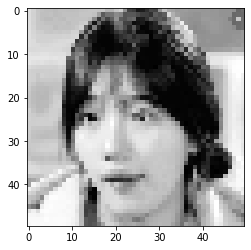

File Name: 10.JPG
File Path: Assignment_Image\bad\10.JPG
Label: good


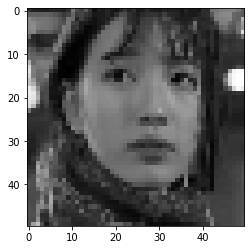

File Name: 11.JPG
File Path: Assignment_Image\bad\11.JPG
Label: good


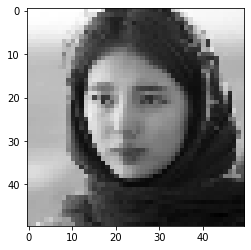

File Name: 12.JPG
File Path: Assignment_Image\bad\12.JPG
Label: bad


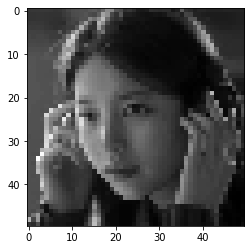

File Name: 13.JPG
File Path: Assignment_Image\bad\13.JPG
Label: bad


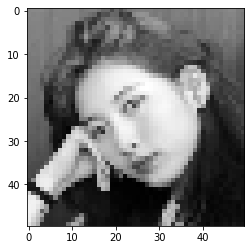

File Name: 14.JPG
File Path: Assignment_Image\bad\14.JPG
Label: good


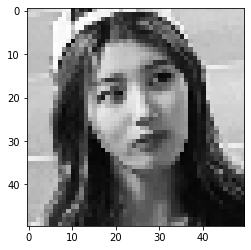

File Name: 15.JPG
File Path: Assignment_Image\bad\15.JPG
Label: good


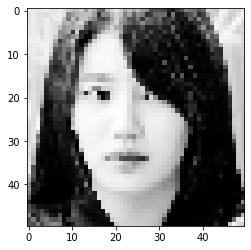

File Name: 16.JPG
File Path: Assignment_Image\bad\16.JPG
Label: bad


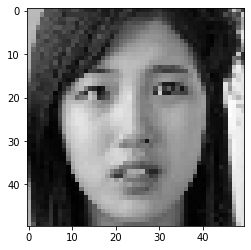

File Name: 17.JPG
File Path: Assignment_Image\bad\17.JPG
Label: good


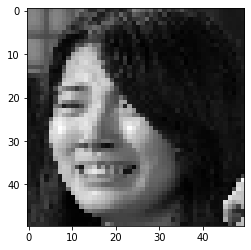

File Name: 18.JPG
File Path: Assignment_Image\bad\18.JPG
Label: good


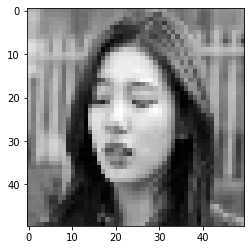

File Name: 19.JPG
File Path: Assignment_Image\bad\19.JPG
Label: bad


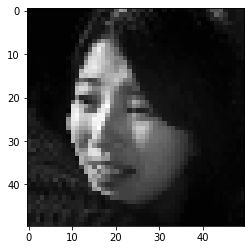

File Name: 2.JPG
File Path: Assignment_Image\bad\2.JPG
Label: good


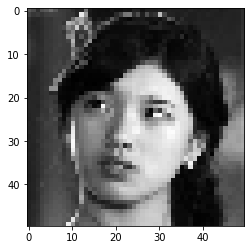

File Name: 20.JPG
File Path: Assignment_Image\bad\20.JPG
Label: good


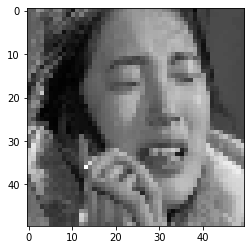

File Name: 3.JPG
File Path: Assignment_Image\bad\3.JPG
Label: bad


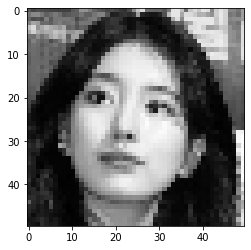

File Name: 4.JPG
File Path: Assignment_Image\bad\4.JPG
Label: good


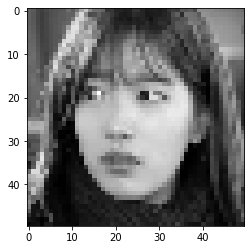

File Name: 5.JPG
File Path: Assignment_Image\bad\5.JPG
Label: bad


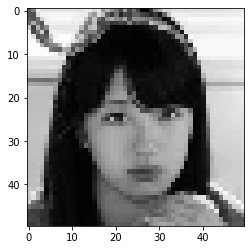

File Name: 6.JPG
File Path: Assignment_Image\bad\6.JPG
Label: good


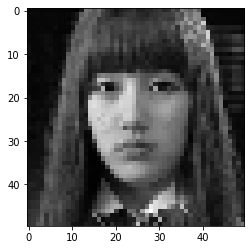

File Name: 7.JPG
File Path: Assignment_Image\bad\7.JPG
Label: good


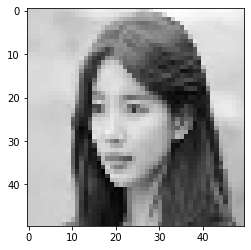

File Name: 8.JPG
File Path: Assignment_Image\bad\8.JPG
Label: bad


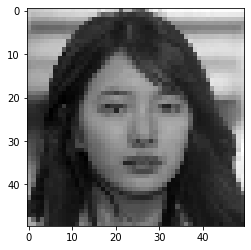

File Name: 9.JPG
File Path: Assignment_Image\bad\9.JPG
Label: bad


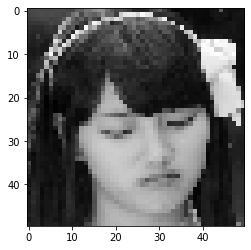

File Name: 1.JPG
File Path: Assignment_Image\good\1.JPG
Label: good


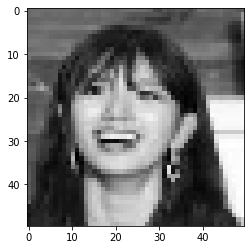

File Name: 10.JPG
File Path: Assignment_Image\good\10.JPG
Label: good


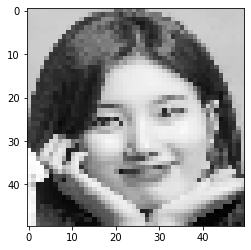

File Name: 11.JPG
File Path: Assignment_Image\good\11.JPG
Label: good


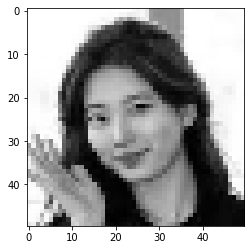

File Name: 12.JPG
File Path: Assignment_Image\good\12.JPG
Label: bad


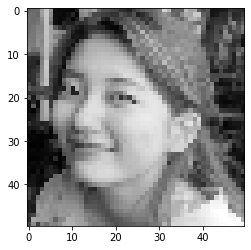

File Name: 13.JPG
File Path: Assignment_Image\good\13.JPG
Label: bad


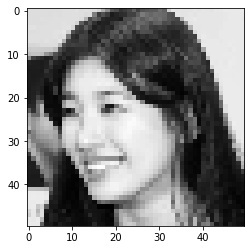

File Name: 14.JPG
File Path: Assignment_Image\good\14.JPG
Label: good


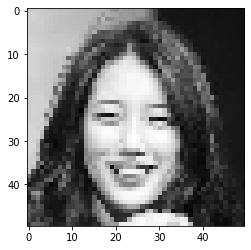

File Name: 15.JPG
File Path: Assignment_Image\good\15.JPG
Label: bad


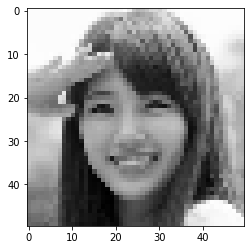

File Name: 16.JPG
File Path: Assignment_Image\good\16.JPG
Label: bad


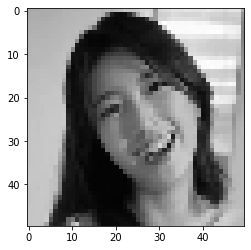

File Name: 17.JPG
File Path: Assignment_Image\good\17.JPG
Label: bad


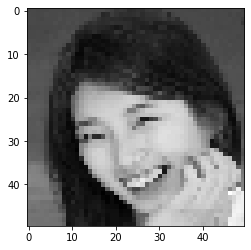

File Name: 18.JPG
File Path: Assignment_Image\good\18.JPG
Label: good


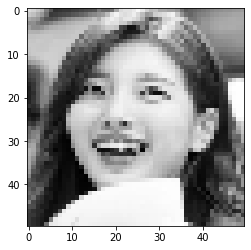

File Name: 19.JPG
File Path: Assignment_Image\good\19.JPG
Label: bad


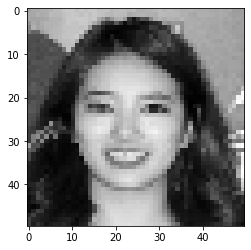

File Name: 2.JPG
File Path: Assignment_Image\good\2.JPG
Label: good


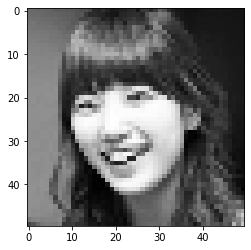

File Name: 20.JPG
File Path: Assignment_Image\good\20.JPG
Label: bad


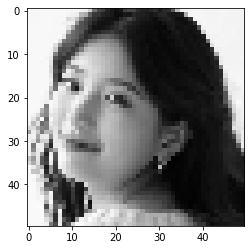

File Name: 3.JPG
File Path: Assignment_Image\good\3.JPG
Label: bad


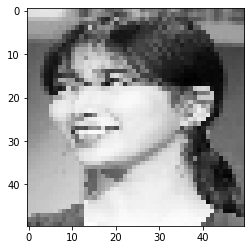

File Name: 4.JPG
File Path: Assignment_Image\good\4.JPG
Label: good


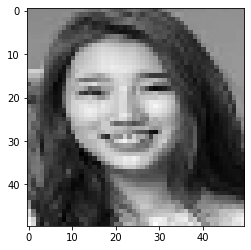

File Name: 5.JPG
File Path: Assignment_Image\good\5.JPG
Label: good


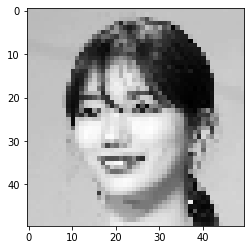

File Name: 6.JPG
File Path: Assignment_Image\good\6.JPG
Label: good


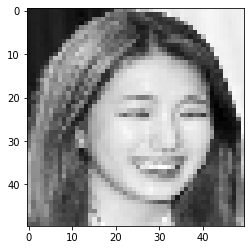

File Name: 7.JPG
File Path: Assignment_Image\good\7.JPG
Label: good


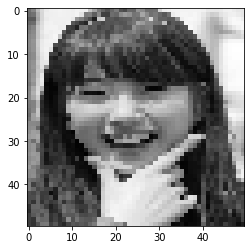

File Name: 8.JPG
File Path: Assignment_Image\good\8.JPG
Label: good


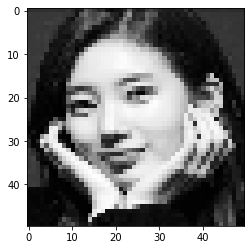

File Name: 9.JPG
File Path: Assignment_Image\good\9.JPG
Label: good


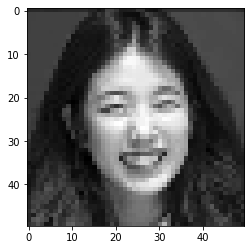

In [22]:
import sys, os
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

X_test_data = []
X_test_data_toshow=[]
y_test_data=[]
files = []
files_path=[]
IMG_SIZE = 50

categories = ["bad","good"]

######## Check All

def loadall_test_data():
    
    DATADIR = "Assignment_Image"
    CATEGORIES = ["bad", "good"]
    for category in CATEGORIES:  # do bad and good
        path = os.path.join(DATADIR,category)  # create path to bad and good
        for img in tqdm(os.listdir(path)):  # iterate over each image per bad and good
            
            try:
                files_path.append(os.path.join(path,img))
                files.append(img) # Add file name
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                X_test_data.append(new_array)  # add this to our test_data
                if(category==CATEGORIES[0]):
                    y_test_data.append(0)
                elif(category==CATEGORIES[1]):
                    y_test_data.append(1)
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))
    
loadall_test_data()
X_test_data_toshow=X_test_data
X_test_data = np.array(X_test_data).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
#########Check All
X_test_data=X_test_data/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X_test_data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))
# model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


#
# model.load_weights("CNN_TRAINEDMODEL_FEI.hdf5")
# model.load_weights("CNN_TRAINEDMODEL_JAFFE.hdf5")
model.load_weights("CNN_TRAINEDMODEL_FEIANDJAFFE.hdf5")



#Predict the model
pre = model.predict(X_test_data)
print(pre)
for i, p in enumerate(pre):
    y = p.argmax()
    print("File Name:", files[i])
    print("File Path:",files_path[i])
    print("Label:", categories[int(round(pre[i][0]))])
    plt.imshow(X_test_data_toshow[i], cmap='gray')  # graph it
    plt.show()  # display!

In [17]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 48, 48, 256)       2560      
_________________________________________________________________
activation_33 (Activation)   (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_34 (Activation)   (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 30976)           

In [18]:
print(model.evaluate(X_test_data,y_test_data))

40/40 [==============================] - 0s 4ms/sample - loss: 1.3508 - acc: 0.5500
[1.3508440971374511, 0.55]
